## Problem Statement Recap:
#### Client: Geely Auto, a Chinese automobile company, wants to enter the US market and understand the factors affecting car pricing.

## Goals:

### Identify significant variables predicting car prices.
### Assess how well these variables describe car prices in the American market.

## Domain Knowledge:

Fuel Type: The type of fuel (gas or diesel) can significantly impact car prices due to differences in fuel efficiency, availability, and environmental concerns.

Aspiration: Turbocharged engines are often associated with higher performance and may command a premium price compared to standard (non-turbocharged) engines.

Door Number: The number of doors can affect the perceived practicality and aesthetics of a car, influencing its market demand and price.

Car Body Type: Different car body types (e.g., convertible, sedan, hatchback) cater to different consumer preferences and needs, leading to variations in prices.

Drive Wheel: The drive wheel configuration (e.g., rear-wheel drive, front-wheel drive) can impact a car's performance, handling, and desirability, thereby affecting its price.

Engine Location: Cars with rear-mounted engines are relatively rare and often associated with high-performance or exotic vehicles, potentially commanding higher prices.

Engine Type: Variations in engine types (e.g., overhead camshaft, rotary engine) can influence performance, efficiency, and maintenance costs, thus affecting prices.

Cylinder Number: The number of cylinders in an engine is indicative of its power output and performance characteristics, which can influence pricing.

Fuel System: Different fuel systems (e.g., multi-point fuel injection, carburetor) affect engine performance and efficiency, potentially impacting car prices.

# Data Exploration

In [1]:
# Nececcary Libraries
import pandas as pd
import numpy as np

In [2]:
#Loading Dataset
df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Reding Data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning and Feature Engineering:

In [7]:
# Explore unique values of categorical variables
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
for column in categorical_columns:
    print(column, ":", df[column].unique())

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [8]:
print('Key Insights')

Key Insights


In [9]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [10]:
df.doornumber.unique()

array(['two', 'four'], dtype=object)

In [11]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [12]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [14]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [16]:
df.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [17]:
df.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [18]:
# Handle missing values
df.dropna(inplace=True)

In [19]:
# Check if missing values are successfully handled
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [20]:
# Extract the company name from the 'CarName' variable
df['Company'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [21]:
# Drop the 'CarName' variable
df.drop(columns=['CarName'], inplace=True)

In [22]:
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [23]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [24]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [25]:
df_encoded.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False


# Modal Training:

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# Define the features (independent variables) and the target variable
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [28]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Drop the 'Company' column
X_train.drop(columns=['Company'], inplace=True)
X_test.drop(columns=['Company'], inplace=True)

In [30]:
# Initialize the linear regression model
model = LinearRegression()

In [31]:
# Fit the model to the training data
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


LinearRegression()

In [32]:
# Predict on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
# Evaluate model performance
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R-squared score on the test set:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared score on the test set: 0.8830825352736322
Mean Squared Error (MSE): 9229934.776555018
Root Mean Squared Error (RMSE): 3038.0807718944898


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


# Residual Analysis

C:\Users\mbkhn\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


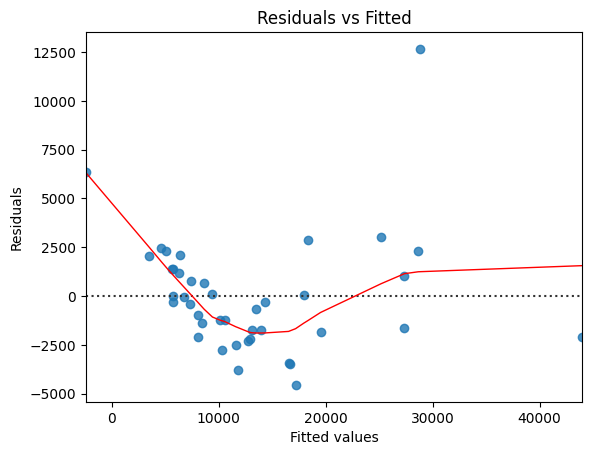

In [33]:
# Plotting residuals
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plotting residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


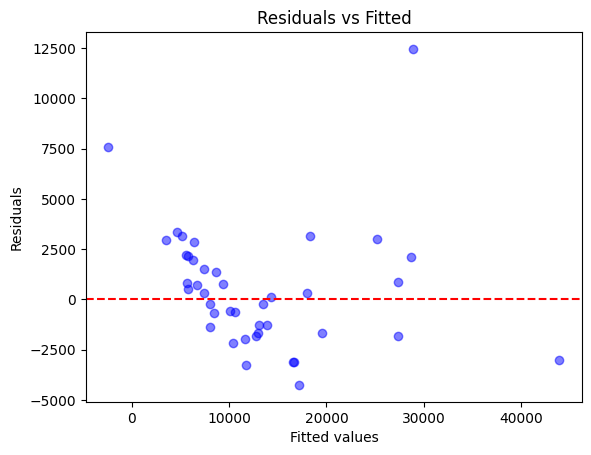

In [34]:
# Calculate residuals
residuals = y_test - model.predict(X_test)

# Residuals vs. Fitted Plot
plt.scatter(model.predict(X_test), residuals, c='blue', alpha=0.5)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


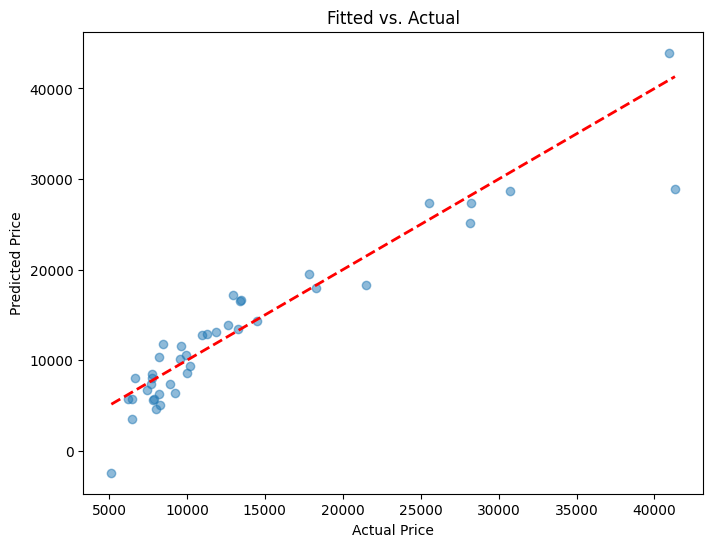

In [35]:
# Fitted vs. Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Fitted vs. Actual')
plt.show()

In [37]:
# Create a DataFrame with actual prices, predicted prices, and variables used for prediction
predictions_df = pd.DataFrame({
    'Actual_Price': y_test,
    'Predicted_Price': y_pred
})

In [38]:
# Add the variables used for prediction to the DataFrame
for column in X_test.columns:
    predictions_df[column] = X_test[column]

In [39]:
# Save the DataFrame as a CSV file
predictions_df.to_csv('car_price_predictions.csv', index=False)

In [40]:
# Print the first few rows of the DataFrame
predictions_df.head()

,Actual_Price,Predicted_Price,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,30760.000,28654.981860,16,0,103.5,189.0,66.9,55.7,3230,209,...,False,False,False,False,False,False,False,True,False,False
9,17859.167,19522.392687,10,0,99.5,178.2,67.9,52.0,3053,131,...,False,False,False,False,False,False,False,True,False,False
100,9549.000,10131.158486,101,0,97.2,173.4,65.2,54.7,2302,120,...,False,False,False,True,False,False,False,False,False,False
132,11850.000,13100.768018,133,3,99.1,186.6,66.5,56.1,2658,121,...,False,False,False,False,False,False,False,True,False,False
68,28248.000,27366.954358,69,-1,110.0,190.9,70.3,58.7,3750,183,...,False,False,False,False,False,True,False,False,False,False


In [41]:
# Get the coefficients (feature importance) from the linear regression model
coefficients = model.coef_

In [42]:
# Create a DataFrame to store the coefficients along with their corresponding variable names
coefficients_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients[0]
})

In [43]:
# Sort the DataFrame by the absolute value of coefficients to identify the most influential variables
coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

In [44]:
# Print all variables and their importance
print("Variables and their importance for predicting car price:")
sorted_coefficients_df

Variables and their importance for predicting car price:


,Variable,Coefficient,Absolute_Coefficient
0,car_ID,-17.390635,17.390635
27,drivewheel_fwd,-17.390635,17.390635
29,enginelocation_front,-17.390635,17.390635
30,enginelocation_rear,-17.390635,17.390635
31,enginetype_dohc,-17.390635,17.390635
32,enginetype_dohcv,-17.390635,17.390635
33,enginetype_l,-17.390635,17.390635
34,enginetype_ohc,-17.390635,17.390635
35,enginetype_ohcf,-17.390635,17.390635
36,enginetype_ohcv,-17.390635,17.390635


In [45]:
# Save the coefficients DataFrame as a CSV file
coefficients_df.to_csv('variable_coefficients.csv', index=False)